# Radio device data set exploration
The idea here is to have a small sensor, a 15€ usb dongle that double as a Software defined radio, and capture all the traffic present on 433 Mhz (https://en.wikipedia.org/wiki/LPD433) and see what sort of data we get and what use can we make of it.
We start by setting up the notebook as usual.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

The software we use for data acquisistion (https://github.com/merbanan/rtl_433) output data in json as one record per line, we load it into pandas as such.

In [2]:
raw_df = pd.read_json('datasets/rtl433.json', lines=True)
raw_df.head()

,time,model,id,unit,learn,code,type,mic,flags,pressure_kPa,...,event,tamper,xactivity,xtamper1,xtamper2,exception,esn,status_hex,triggered,storage
0,2020-11-18 08:58:54,Smoke-GS558,12321,27.0,0.0,06043b,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-11-18 08:59:04,Smoke-GS558,12321,27.0,0.0,06043b,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-11-18 08:59:15,Smoke-GS558,12321,27.0,0.0,06043b,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-11-18 08:59:25,Smoke-GS558,12321,27.0,0.0,06043b,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-11-18 08:59:36,Smoke-GS558,12321,27.0,0.0,06043b,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
raw_df['timestamp'] = raw_df['time'].apply(pd.to_datetime) # convert the time to the proper type
#raw_df = raw_df.set_index('timestamp')
raw_df.head()

,time,model,id,unit,learn,code,type,mic,flags,pressure_kPa,...,tamper,xactivity,xtamper1,xtamper2,exception,esn,status_hex,triggered,storage,timestamp
0,2020-11-18 08:58:54,Smoke-GS558,12321,27.0,0.0,06043b,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-11-18 08:58:54
1,2020-11-18 08:59:04,Smoke-GS558,12321,27.0,0.0,06043b,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-11-18 08:59:04
2,2020-11-18 08:59:15,Smoke-GS558,12321,27.0,0.0,06043b,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-11-18 08:59:15
3,2020-11-18 08:59:25,Smoke-GS558,12321,27.0,0.0,06043b,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-11-18 08:59:25
4,2020-11-18 08:59:36,Smoke-GS558,12321,27.0,0.0,06043b,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-11-18 08:59:36


We can see there's a Smoke sensor (Smoke-GS5558) in the neighbourhood, some cars sensor and a weather station (Ambientweather-F007TH).
Let's have a look to the cars.

<AxesSubplot:xlabel='model'>

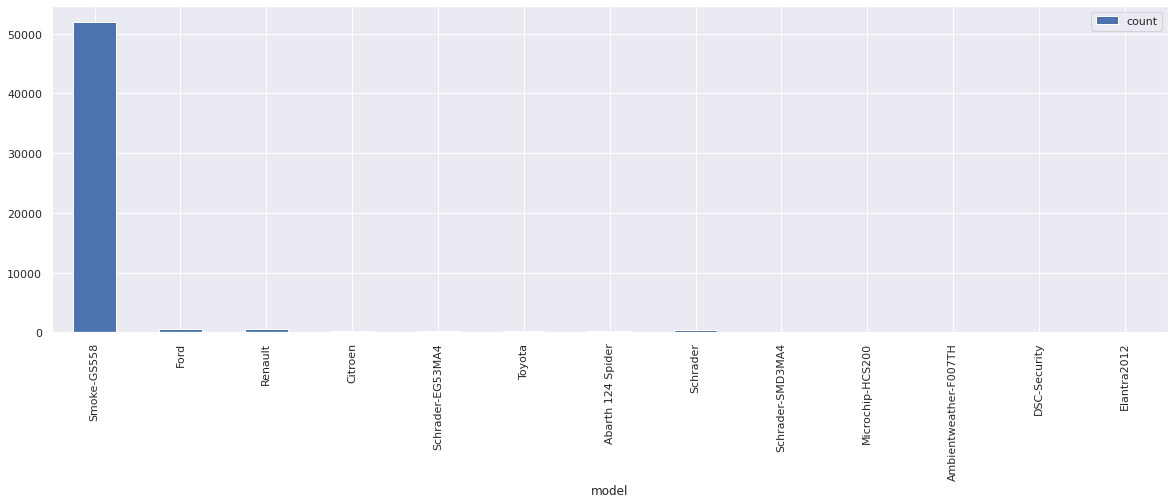

In [4]:
p_df = pd.DataFrame(raw_df, columns=['model']) #extract the field we want to plot
p_df['count'] = 1 # assign a value of 1 to every row to make the count possible

import seaborn as sns
sns.set(rc={'figure.figsize': (20,6)}) # make it pretty

groups = p_df.groupby(pd.Grouper(key='model')) # aggregate on model
groups.count().plot(kind='bar') # sum per model bucket and plot

In [5]:
cars_df = raw_df[raw_df.model != 'Smoke-GS558']
cars_df = cars_df[cars_df.model != 'Ambientweather-F007TH']

cars_df.head()

,time,model,id,unit,learn,code,type,mic,flags,pressure_kPa,...,tamper,xactivity,xtamper1,xtamper2,exception,esn,status_hex,triggered,storage,timestamp
25,2020-11-18 09:03:09,Ford,66d483e9,NaN,NaN,79004b,TPMS,CHECKSUM,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-11-18 09:03:09
26,2020-11-18 09:03:09,Ford,66d482d0,NaN,NaN,791d4b,TPMS,CHECKSUM,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-11-18 09:03:09
87,2020-11-18 09:13:36,Ford,018c8ef6,NaN,NaN,95421e,TPMS,CHECKSUM,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-11-18 09:13:36
88,2020-11-18 09:13:36,Ford,018c8ef6,NaN,NaN,95421e,TPMS,CHECKSUM,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-11-18 09:13:36
89,2020-11-18 09:13:36,Ford,018c8ef6,NaN,NaN,95421e,TPMS,CHECKSUM,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-11-18 09:13:36


## Here in my car ...
Let's see what sort of data we have, TPMS (https://en.wikipedia.org/wiki/Tire-pressure_monitoring_system) 
and NaN... let's see what brand of sensor and cars we can get ...

In [6]:
types = pd.DataFrame(cars_df['type']).drop_duplicates()
types.head()

,type
25,TPMS
2137,NaN


In [7]:
models = pd.DataFrame(cars_df['model']).drop_duplicates()
models.head(20)

,model
25,Ford
104,Renault
113,Citroen
126,Schrader-EG53MA4
285,Toyota
682,Abarth 124 Spider
811,Schrader
1159,Schrader-SMD3MA4
2137,Microchip-HCS200
17980,DSC-Security


Once again we want to plot it but this time, let's use something else that will make the amount of vehicule of a certain type stand out (and disregard time) 

<AxesSubplot:xlabel='model'>

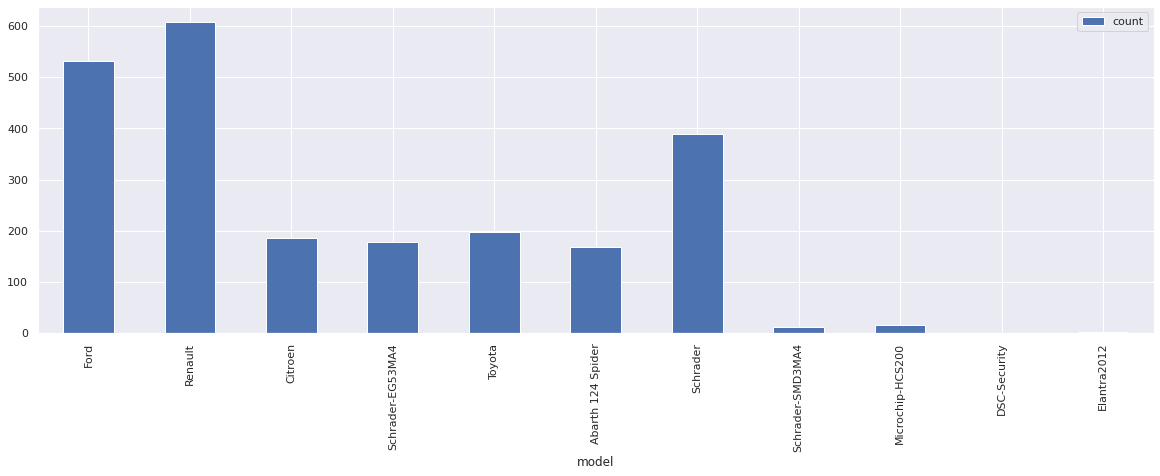

In [8]:
p_df = pd.DataFrame(cars_df, columns=['model']) #extract the field we want to plot
p_df['count'] = 1 # assign a value of 1 to every row to make the count possible

groups = p_df.groupby(pd.Grouper(key='model')) # aggregate on model
groups.count().plot(kind='bar') # sum per model bucket and plot

We can see some sensor identified themselves by brand like Ford or Renault and some by the maker of the sensor like 'Schrader' with submodels in the name. There seems to even be some pretty accurate one like the 'Ford Elantra 2012' ... Let's have a look to the Renault to see if we can follow vehicules.

In [9]:
renault_df = raw_df[raw_df.model == 'Renault']
renault_df.describe()

,unit,learn,pressure_kPa,temperature_C,repeat,maybe_battery,temperature_F,status,pressure_PSI,battery_ok,...,humidity,closed,event,tamper,xactivity,xtamper1,xtamper2,exception,triggered,storage
count,0.0,0.0,607.000000,607.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,229.936161,16.596376,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,32.946115,9.302410,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,180.750000,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,207.000000,12.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,222.750000,15.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,244.875000,20.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,379.500000,141.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='timestamp'>

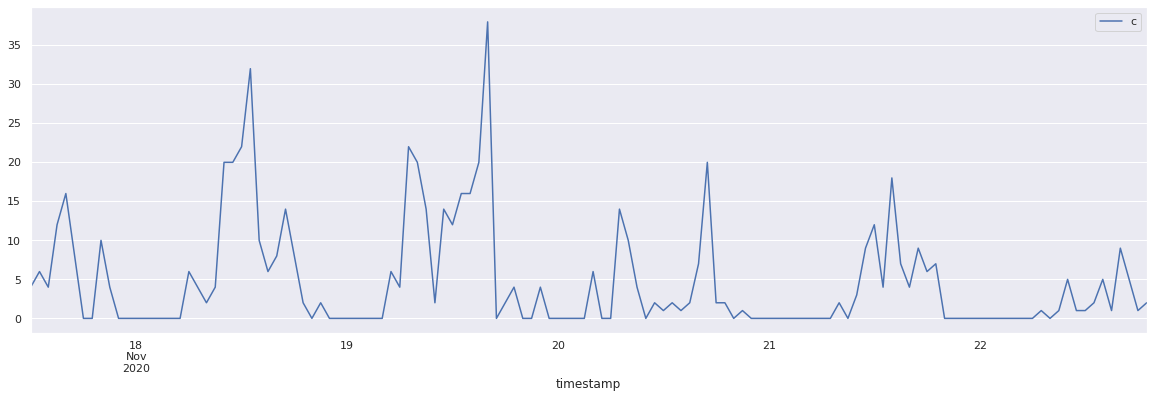

In [10]:
p_df = pd.DataFrame(renault_df, columns=['timestamp'])
p_df['c'] = 1
groups = p_df.groupby(pd.Grouper(key='timestamp', freq='1H')) # aggregate on model
groups.count().plot() # sum per time bucket and plot

We Can see the traffic going up and down every day with spikes in the morning and evening and flat line during the night (Covid-19 curefew). Now can we identify and track a specific vehicule in that data stream ? Which feature can we use to do that ?

In [11]:
# start by dropping NA column.
feat_df = renault_df.dropna(axis=1)
feat_df.head()

,time,model,id,type,mic,flags,pressure_kPa,temperature_C,timestamp
104,2020-11-18 09:16:01,Renault,bcd8a4,TPMS,CRC,34,241.50,22.0,2020-11-18 09:16:01
107,2020-11-18 09:16:20,Renault,826a1c,TPMS,CRC,36,236.25,13.0,2020-11-18 09:16:20
395,2020-11-18 10:03:36,Renault,830090,TPMS,CRC,36,201.00,18.0,2020-11-18 10:03:36
465,2020-11-18 10:15:32,Renault,e0eff9,TPMS,CRC,36,284.25,15.0,2020-11-18 10:15:32
466,2020-11-18 10:15:32,Renault,e0eff9,TPMS,CRC,36,284.25,15.0,2020-11-18 10:15:32


In [12]:
feat_df.size

5463

<AxesSubplot:xlabel='timestamp'>

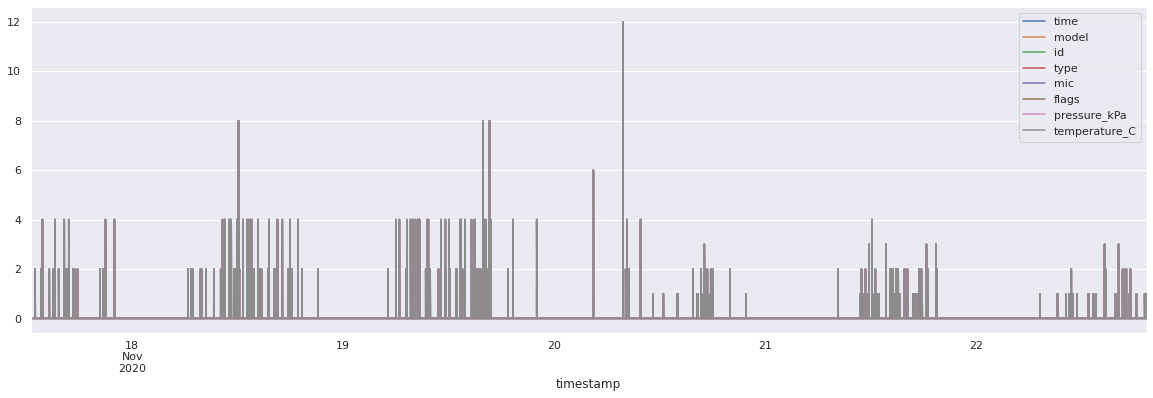

In [13]:
groups = feat_df.groupby(pd.Grouper(key='timestamp', freq='5s', label='right')) # aggregate per 5 seconds
groups.count().plot() # sum per time bucket and plot

<AxesSubplot:xlabel='id'>

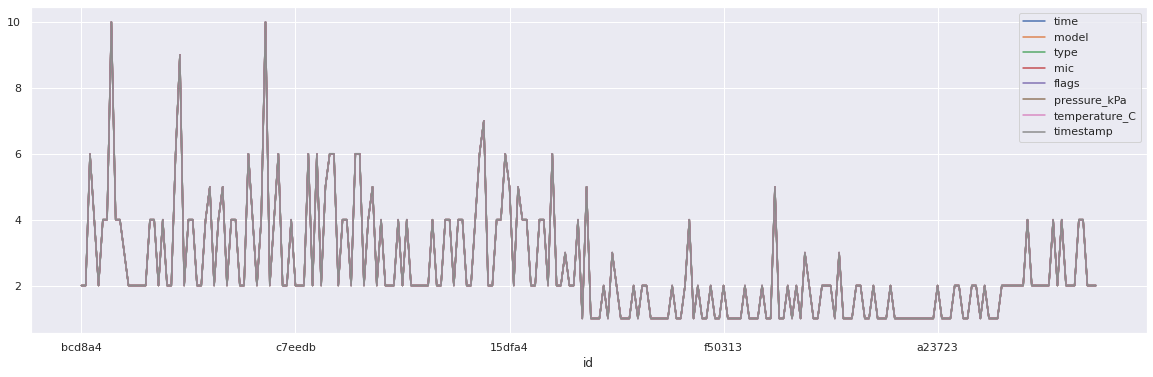

In [14]:
groups = feat_df.groupby(pd.Grouper(key='id')) # aggregate per id ?
groups.count().plot()